# Visualization with Filled NaN Values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load the Cleaned Dataset


In [6]:
df = pd.read_csv('../data/processed/DataScientist_cleaned.csv')

## Handle missing values

In [7]:
df['Size'] = df['Size'].replace(pd.NA, 'Unknown')
df['Size'] = df['Size'].fillna(df['Size'].mode()[0])

In [8]:
# fill nan values in Rating and Founded columns with the mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Founded'] = df['Founded'].fillna(df['Founded'].mean())

In [9]:
def parse_salary(salary):
    if 'K' in salary:
        return int(salary.replace('K', '').replace('$', '').split('-')[0]) * 1000
    else:
        return np.nan

df['salary'] = df['Salary Estimate'].apply(parse_salary)

# fill NaN values in salary with the mean
df['salary'] = df['salary'].fillna(df['salary'].mean())

## Plot Distribution of Salaries


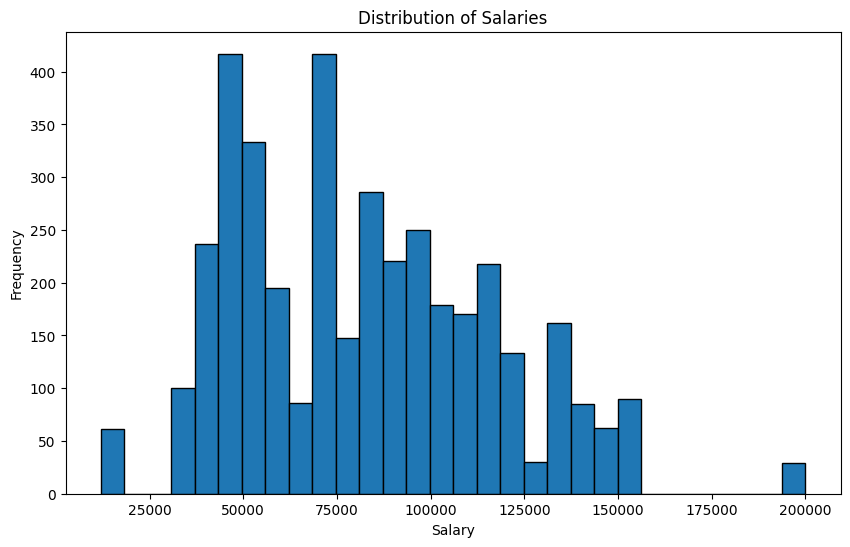

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['salary'], bins=30, edgecolor='k')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()


## Top 10 Most Frequently Used Words in Job Descriptions


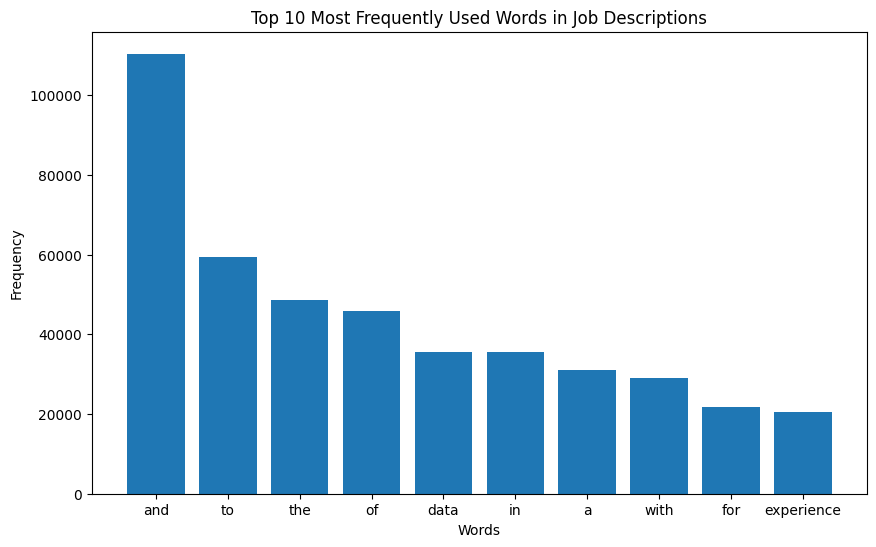

In [11]:
from collections import Counter
import re

# Combine all job descriptions into one string
all_descriptions = ' '.join(df['Job Description']).lower()

# Remove non-alphabetic characters
all_descriptions = re.sub(r'[^a-z\s]', '', all_descriptions)

# Split into individual words
words = all_descriptions.split()

word_counts = Counter(words)
common_words = word_counts.most_common(10)

# Separate words and counts for plotting
words, counts = zip(*common_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequently Used Words in Job Descriptions')
plt.show()


## Correlation Between Ratings and Salaries

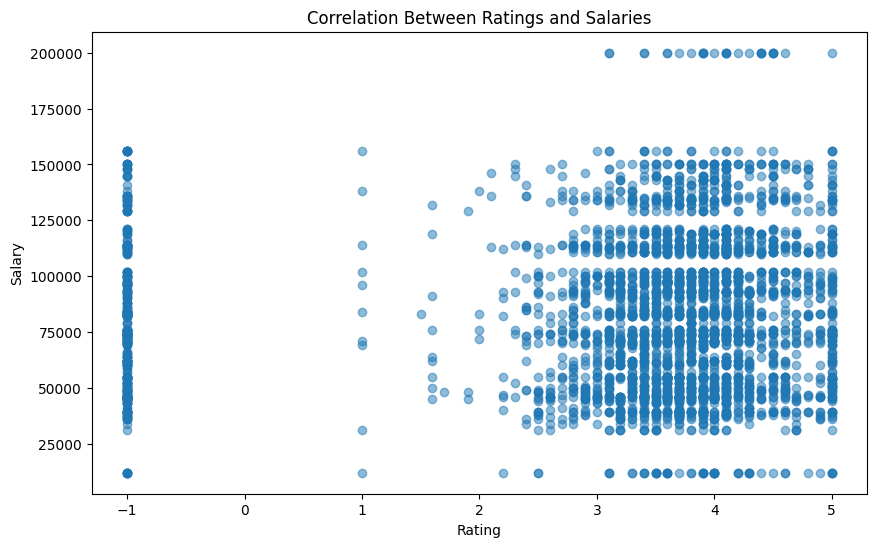

Correlation between ratings and salaries: 0.05257935977184456


In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['salary'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Salary')
plt.title('Correlation Between Ratings and Salaries')
plt.show()

correlation_rating_salary = df['Rating'].corr(df['salary'])
print(f'Correlation between ratings and salaries: {correlation_rating_salary}')


## Correlation Between Employee Number and Salaries


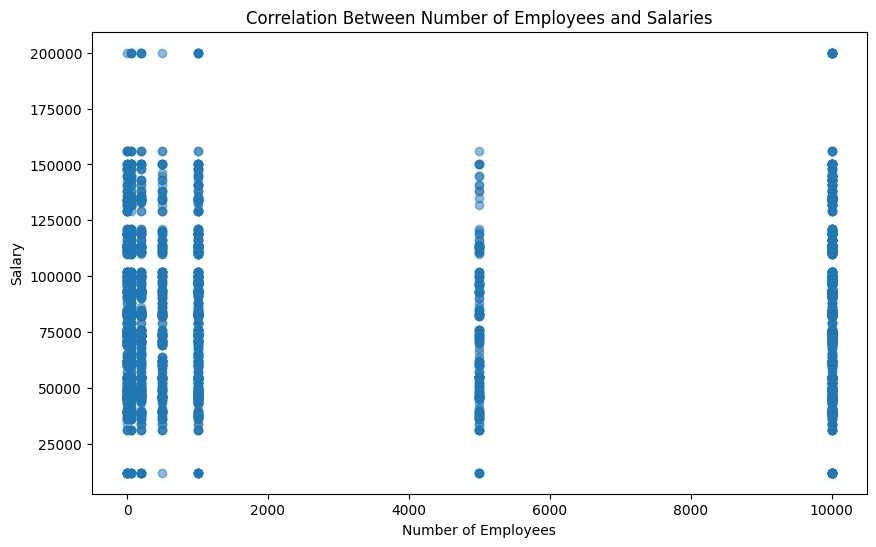

Correlation between number of employees and salaries: 0.03166212732275095


In [13]:
df['Employee Number'] = df['Size'].str.extract('(\d+)', expand=False).astype(float)

plt.figure(figsize=(10, 6))
plt.scatter(df['Employee Number'], df['salary'], alpha=0.5)
plt.xlabel('Number of Employees')
plt.ylabel('Salary')
plt.title('Correlation Between Number of Employees and Salaries')
plt.show()

correlation_employee_salary = df['Employee Number'].corr(df['salary'])
print(f'Correlation between number of employees and salaries: {correlation_employee_salary}')


## Count of easy apply jobs

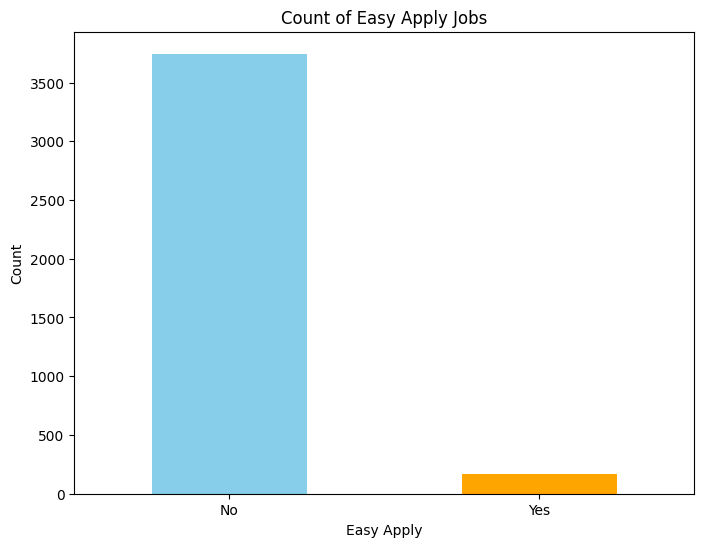

In [14]:
easy_apply_counts = df['Easy Apply'].value_counts()
plt.figure(figsize=(8, 6))
easy_apply_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Easy Apply')
plt.ylabel('Count')
plt.title('Count of Easy Apply Jobs')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()


## Average salary by company size

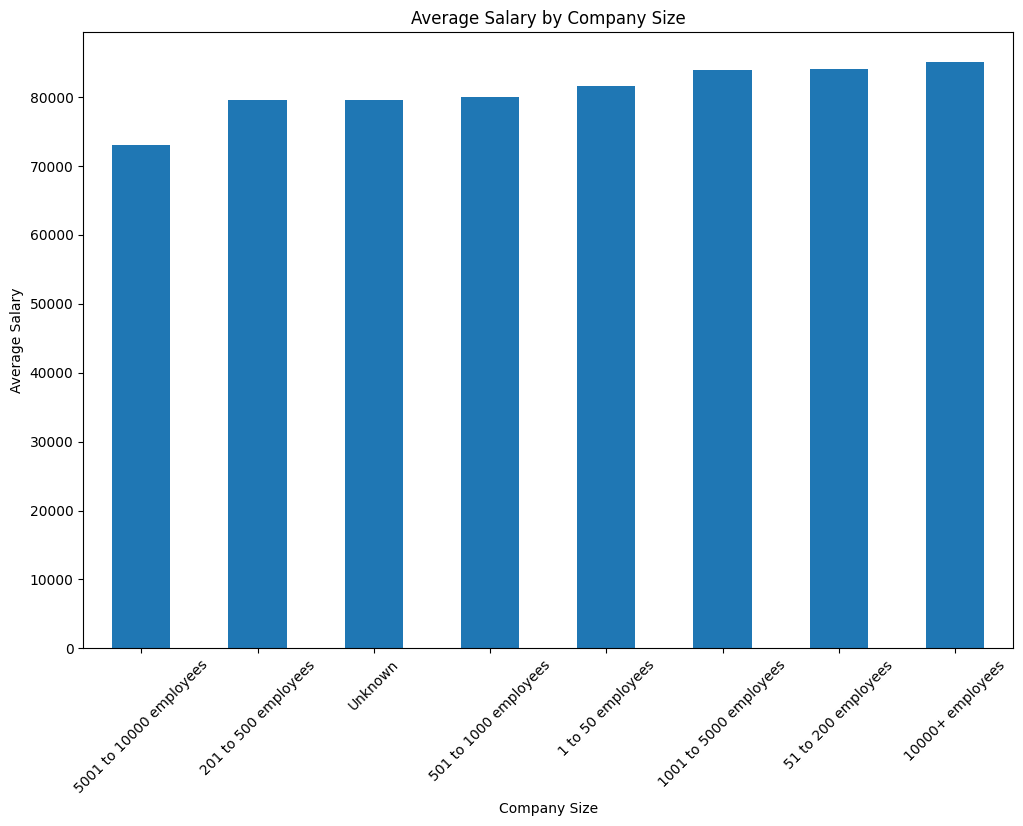

In [15]:
company_size_salary = df.groupby('Size')['salary'].mean().sort_values()
plt.figure(figsize=(12, 8))
company_size_salary.plot(kind='bar')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=45)
plt.show()
